<a href="https://colab.research.google.com/github/ImanLiao/COMP3029-ComputerVision/blob/main/COMP3029_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook documents the lab-3 excercise for the module COMP3029 (Computer Vision) at the University of Nottingham Malaysia, prepared by Dr. Iman Yi Liao.

The lab session aims to provide students experience on using Python and its libraries for preparing image datasets for training, validation and testing.

# Main Tasks

1. Create oil palm seed images dataset in csv file
2. Create training, validation, and testing dataset from csv files
3. Understand machine learning classification functions in scikit-learn
4. Perform image classification tasks

# Installation of libraries

**NumPy** is a library for the Python programming language that (among other things) provides support for large, multi-dimensional arrays.

Going hand-in-hand with NumPy, we also have **SciPy**. SciPy adds further support for scientific and technical computing. 

The **h5py** library is the de-facto standard in Python to store large numerical datasets. It provides support for NumPy arrays. So, if you have a large dataset represented as a NumPy array, and it won’t fit into memory, or if you want efficient, persistent storage of NumPy arrays, then h5py is the way to go. 

Simply put, **matplotlib** is a plotting library. If you’ve ever used MATLAB before, you’ll probably feel very comfortable in the matplotlib environment.

PIL and **Pillow** does simple image manipulations, such as resizing, rotation, etc.

If NumPy’s main goal is large, efficient, multi-dimensional array representations, then, by far, the main goal of **OpenCV** is real-time image processing. This library has been around since 1999, but it wasn’t until the 2.0 release in 2009 did we see the incredible NumPy support.

The algorithms included in **scikit-image** follow closer to the state-of-the-art in computer vision. New algorithms right from academic papers can be found in scikit-image, but in order to (effectively) use these algorithms, you need to have developed some rigor and understanding in the computer vision field.

**Scikit-learn** isn’t an image processing or computer vision library — it’s a machine learning library. That said, you can’t have advanced computer vision techniques without some sort of machine learning, whether it be clustering, vector quantization, classification models, etc. Scikit-learn also includes a handful of image feature extraction functions as well.

**Pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

We only need to install OpenCV as the rest of the libraries mentioned above have already been installed in Google Colab environment. 

In [2]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

# Mont Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/My Drive/AAR

/content/drive/My Drive/AAR


In [5]:
!ls "/content/drive/My Drive/AAR/seed"

BadSeed  cropped.jpg  GoodSeed	no_blue_channel.jpg


# Preparing the Oil Palm Dataset

## Rename the image file names
The original image file names are long and not convenient for creating csv files. We would like to rename them first.

In [ ]:
path = "/content/drive/My Drive/AAR/seed/GoodSeed/"
lastword = path.rsplit('/', 2)[1]
print(lastword)

GoodSeed


In [6]:
# importing required modules 
import os

def fn_rename_file(path):
  last_word = path.rsplit('/', 2)[1]
  for count, filename in enumerate(os.listdir(path)):
    src_name = path + filename
    dst_name = path + last_word + str(count) + ".jpg"
    os.rename(src_name, dst_name) 

# Driver Code 
if __name__ == '__main__': 

  # Change the name of the files for good seeds
  path = "/content/drive/My Drive/AAR/seed/GoodSeed/"
  fn_rename_file(path)

  # Change the name of the files for bad seeds
  path = "/content/drive/My Drive/AAR/seed/BadSeed/"
  fn_rename_file(path)

In [7]:
!ls "/content/drive/My Drive/AAR/seed/GoodSeed"

GoodSeed0.jpg	 GoodSeed20.jpg  GoodSeed40.jpg  GoodSeed60.jpg  GoodSeed80.jpg
GoodSeed100.jpg  GoodSeed21.jpg  GoodSeed41.jpg  GoodSeed61.jpg  GoodSeed81.jpg
GoodSeed101.jpg  GoodSeed22.jpg  GoodSeed42.jpg  GoodSeed62.jpg  GoodSeed82.jpg
GoodSeed102.jpg  GoodSeed23.jpg  GoodSeed43.jpg  GoodSeed63.jpg  GoodSeed83.jpg
GoodSeed103.jpg  GoodSeed24.jpg  GoodSeed44.jpg  GoodSeed64.jpg  GoodSeed84.jpg
GoodSeed104.jpg  GoodSeed25.jpg  GoodSeed45.jpg  GoodSeed65.jpg  GoodSeed85.jpg
GoodSeed105.jpg  GoodSeed26.jpg  GoodSeed46.jpg  GoodSeed66.jpg  GoodSeed86.jpg
GoodSeed106.jpg  GoodSeed27.jpg  GoodSeed47.jpg  GoodSeed67.jpg  GoodSeed87.jpg
GoodSeed107.jpg  GoodSeed28.jpg  GoodSeed48.jpg  GoodSeed68.jpg  GoodSeed88.jpg
GoodSeed108.jpg  GoodSeed29.jpg  GoodSeed49.jpg  GoodSeed69.jpg  GoodSeed89.jpg
GoodSeed109.jpg  GoodSeed2.jpg	 GoodSeed4.jpg	 GoodSeed6.jpg	 GoodSeed8.jpg
GoodSeed10.jpg	 GoodSeed30.jpg  GoodSeed50.jpg  GoodSeed70.jpg  GoodSeed90.jpg
GoodSeed11.jpg	 GoodSeed31.jpg  GoodSeed51.jpg 

In [8]:
!ls "/content/drive/My Drive/AAR/seed/BadSeed"

BadSeed0.jpg	BadSeed24.jpg  BadSeed43.jpg  BadSeed62.jpg  BadSeed82.jpg
BadSeed100.jpg	BadSeed25.jpg  BadSeed44.jpg  BadSeed63.jpg  BadSeed83.jpg
BadSeed101.jpg	BadSeed26.jpg  BadSeed45.jpg  BadSeed64.jpg  BadSeed84.jpg
BadSeed102.jpg	BadSeed27.jpg  BadSeed46.jpg  BadSeed65.jpg  BadSeed85.jpg
BadSeed103.jpg	BadSeed28.jpg  BadSeed47.jpg  BadSeed66.jpg  BadSeed86.jpg
BadSeed104.jpg	BadSeed29.jpg  BadSeed48.jpg  BadSeed67.jpg  BadSeed87.jpg
BadSeed10.jpg	BadSeed2.jpg   BadSeed49.jpg  BadSeed68.jpg  BadSeed88.jpg
BadSeed11.jpg	BadSeed30.jpg  BadSeed4.jpg   BadSeed69.jpg  BadSeed89.jpg
BadSeed12.jpg	BadSeed31.jpg  BadSeed50.jpg  BadSeed6.jpg   BadSeed8.jpg
BadSeed13.jpg	BadSeed32.jpg  BadSeed51.jpg  BadSeed70.jpg  BadSeed90.jpg
BadSeed14.jpg	BadSeed33.jpg  BadSeed52.jpg  BadSeed71.jpg  BadSeed91.jpg
BadSeed15.jpg	BadSeed34.jpg  BadSeed53.jpg  BadSeed72.jpg  BadSeed92.jpg
BadSeed16.jpg	BadSeed35.jpg  BadSeed54.jpg  BadSeed73.jpg  BadSeed93.jpg
BadSeed17.jpg	BadSeed36.jpg  BadSeed55.jpg  BadS

## Prepare training and testing dataset in csv files
You can do this in Exel, since the file names are much easier to copy and deal with. Make sure you save the files as .csv. However, we want to create the csv files in Python for convenience. For consistency, I will reserve the first 20 images in both good and bad seed folders as testing dataset.

In [9]:
import csv
import os

with open('testdata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_name", "label"])

    # create test data with the first 20 images of good seeds
    path = "/content/drive/My Drive/AAR/seed/GoodSeed/"
    for count, filename in enumerate(os.listdir(path)):
      if count > 19:
        break
      writer.writerow([filename, 1])
 
    # create test data with the first 20 images of bad seeds
    path = "/content/drive/My Drive/AAR/seed/BadSeed/"
    for count, filename in enumerate(os.listdir(path)):
      if count > 19:
        break
      writer.writerow([filename, 0])

Now create the training dataset in csv file

In [10]:
with open('trainingdata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_name", "label"])

    # create training data with the rest of the images of good seeds
    path = "/content/drive/My Drive/AAR/seed/GoodSeed/"
    for count, filename in enumerate(os.listdir(path)):
      if count > 19:
        writer.writerow([filename, 1])

    # create training data with the rest of the images of bad seeds
    path = "/content/drive/My Drive/AAR/seed/BadSeed/"
    for count, filename in enumerate(os.listdir(path)):
      if count > 19:
        writer.writerow([filename, 0])

## Load and create training and validation dataset
Load the data from trainingdata.csv and split it into training and validation (80/20)

In [11]:
import csv
import pandas as pd
import numpy as np

df = pd.read_csv("trainingdata.csv")
train, validate = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])
print(train.shape, validate.shape)
print(validate)

(139, 2) (35, 2)
          image_name  label
134    BadSeed65.jpg      0
145    BadSeed76.jpg      0
159    BadSeed90.jpg      0
63    GoodSeed83.jpg      1
54    GoodSeed74.jpg      1
107    BadSeed38.jpg      0
50    GoodSeed70.jpg      1
171   BadSeed102.jpg      0
58    GoodSeed78.jpg      1
48    GoodSeed68.jpg      1
88   GoodSeed108.jpg      1
21    GoodSeed41.jpg      1
57    GoodSeed77.jpg      1
168    BadSeed99.jpg      0
129    BadSeed60.jpg      0
37    GoodSeed57.jpg      1
164    BadSeed95.jpg      0
1     GoodSeed21.jpg      1
52    GoodSeed72.jpg      1
149    BadSeed80.jpg      0
130    BadSeed61.jpg      0
151    BadSeed82.jpg      0
103    BadSeed34.jpg      0
99     BadSeed30.jpg      0
116    BadSeed47.jpg      0
87   GoodSeed107.jpg      1
74    GoodSeed94.jpg      1
121    BadSeed52.jpg      0
173   BadSeed104.jpg      0
20    GoodSeed40.jpg      1
71    GoodSeed91.jpg      1
106    BadSeed37.jpg      0
14    GoodSeed34.jpg      1
92     BadSeed23.jpg      0
102

In [ ]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(train.iloc[1][0])

BadSeed75.jpg


Create the actual dataset with image data and labels

In [12]:
import csv
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# You can also write an object class for the dataloader
def mydataloader(mydata, path):
  # load data from Pandas' DataFrame structure
  dataset = []
  for i in range(len(mydata)):
    current = mydata.iloc[i]
    if current[1] == 1:
      fullpath = path + 'GoodSeed/' + current[0]
    elif current[1] == 0:
      fullpath = path + 'BadSeed/' + current[0]
    image = cv2.imread(fullpath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convert BGR to RGB
    # print(image.shape)
    image = cv2.resize(image,(int(image.shape[1]/20),int(image.shape[0]/20))) # I'm resizing the image but you should try to do some appropriate pre-processing to obtaining smaller image size
    dataset.append((image, current[1]))
    print('Data processed', i)

  return dataset


root_path = '/content/drive/My Drive/AAR/seed/'

# Load the training dataset
print('Loading training dataset...')
training_data = mydataloader(train, root_path)
print('Trainding dataset loaded!')

# Load the validation dataset
print('Loading validation dataset...')
validation_data = mydataloader(validate, root_path)
print('Validation dataset loaded!')

# Load the testing dataset
print('Loading testing dataset...')
test = pd.read_csv("testdata.csv")
testing_data = mydataloader(test, root_path)
print('Testing dataset loaded!')

Loading training dataset...
Data processed 0
Data processed 1
Data processed 2
Data processed 3
Data processed 4
Data processed 5
Data processed 6
Data processed 7
Data processed 8
Data processed 9
Data processed 10
Data processed 11
Data processed 12
Data processed 13
Data processed 14
Data processed 15
Data processed 16
Data processed 17
Data processed 18
Data processed 19
Data processed 20
Data processed 21
Data processed 22
Data processed 23
Data processed 24
Data processed 25
Data processed 26
Data processed 27
Data processed 28
Data processed 29
Data processed 30
Data processed 31
Data processed 32
Data processed 33
Data processed 34
Data processed 35
Data processed 36
Data processed 37
Data processed 38
Data processed 39
Data processed 40
Data processed 41
Data processed 42
Data processed 43
Data processed 44
Data processed 45
Data processed 46
Data processed 47
Data processed 48
Data processed 49
Data processed 50
Data processed 51
Data processed 52
Data processed 53
Data proce

40
(182, 273, 3)
0


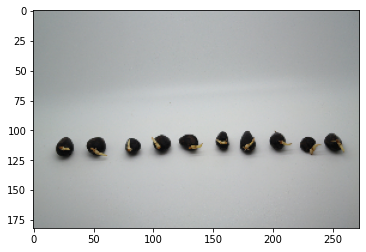

In [13]:
print(len(testing_data))
print(training_data[0][0].shape)

plt.imshow(training_data[1][0])
print(training_data[1][1])

# Image Segmentation

## Use edge detection tools

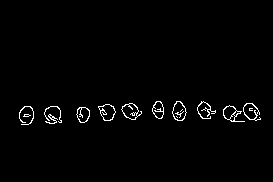

In [14]:
# Convert the cropped image to grayscale
img = training_data[1][0]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_edged = cv2.Canny(img_gray, 20, 200)
cv2_imshow(img_edged)

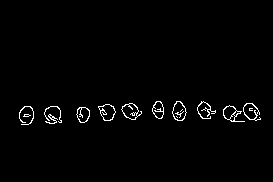

Numbers of contours found=12


In [15]:
# Copy the image edge image before using contour function to find the contours
img_edged_copy = img_edged.copy()

contours, hierarchy = cv2.findContours(img_edged_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2_imshow(img_edged_copy)
# print(contours)
print('Numbers of contours found=' + str(len(contours)))

## Segment image in colour space

(49686, 3)
(49686, 1)
(2, 3)


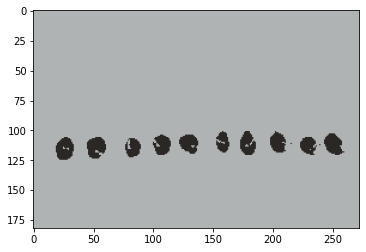

In [16]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 2 # as we want only to differentiate the seeds from the background, hoping to merge the sprouts into the foreground
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(labels.shape)

# convert back to 8 bit values
centers = np.uint8(centers)
print(centers.shape)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)

# show the image
import matplotlib.pyplot as plt
plt.imshow(segmented_image)
plt.show()

## Segment the seeds spatially

[[110.93617021 129.79787234]
 [112.60927152 229.33774834]
 [114.12962963  52.19444444]
 [111.21276596 178.75      ]
 [112.13114754 107.44808743]
 [110.24137931 204.02873563]
 [115.47488584  26.02739726]
 [114.66666667  83.17687075]
 [109.88235294 158.08088235]
 [111.6127451  250.3872549 ]]


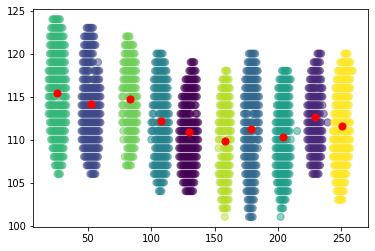

In [17]:
from pandas import DataFrame  # we need to use dataframe to organise our list of coordinates
from sklearn.cluster import KMeans

# Extract the coordinates of the pixels that represent the foreground, i.e., oil palm seeds
# Based on the inspection we've done in the above, that pxiel value should be [42, 40, 37]

results = np.where(segmented_image == 42) # we only need to use value 42 since it's unique for the array [42, 40, 37], one can use 40 or 37 instead as well
# zip the coordinates together
foreground_points = list(zip(results[0], results[1]))

# convert to the dataframe 
df = DataFrame(foreground_points, columns=['y','x'])

spatial_kmeans = KMeans(n_clusters=10).fit(df)  # as there are 10 seeds in an image
centroids = spatial_kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= spatial_kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=50)
plt.show()

# Image Feature Extraction with scikit-image

For more information, check the details at https://scikit-image.org/docs/dev/api/skimage.feature.html 

## Shape features (HOG)

(182, 273, 3)


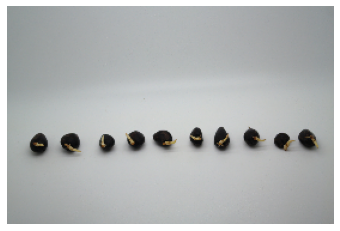

In [18]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = training_data[1][0]
plt.axis("off")
plt.imshow(img)
print(img.shape)

(128, 192, 3)


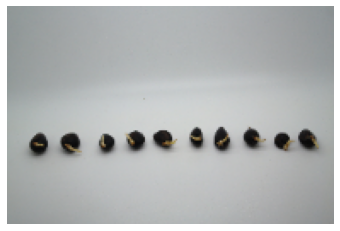

In [19]:
# resizing image
resized_img = cv2.resize(img, (64*3, 64*2))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

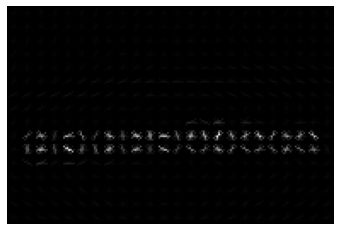

In [20]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [21]:
print(fd)
print(fd.shape)

[0.25377286 0.13219123 0.04029223 ... 0.00949037 0.0692126  0.02122112]
(12420,)


# Machine Learning Methods
Following examples are extracted from scikit-learn.org

## SVM
Here's one simple example for classifying dataset generated by XOR

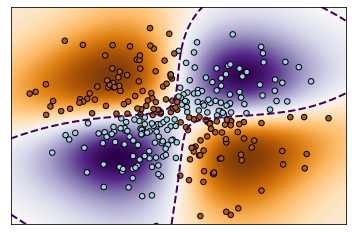

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Another example on SVM: face recognition based on PCA feature extraction + SVM classifier

2021-02-25 09:46:00,133 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2021-02-25 09:46:00,388 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2021-02-25 09:46:00,593 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2021-02-25 09:46:00,840 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.192s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s
Fitting the classifier to the training set
done in 41.312s
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.068s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00

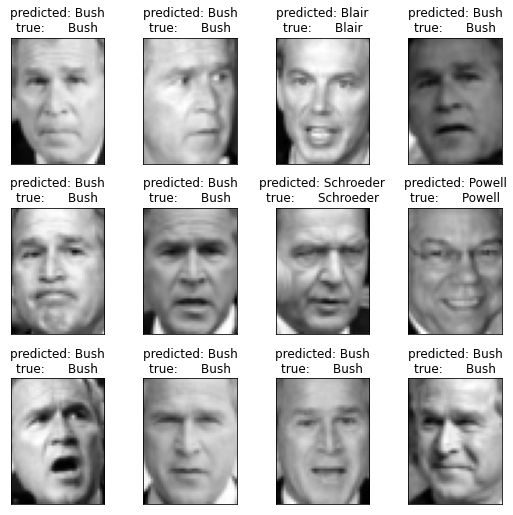

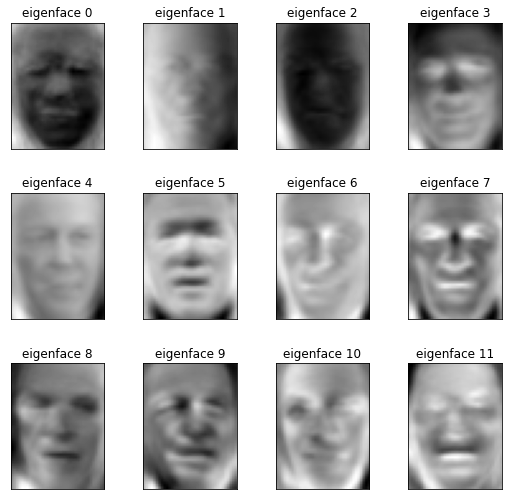

In [23]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## kNN

2021-02-25 09:48:52,484 NumExpr defaulting to 4 threads.


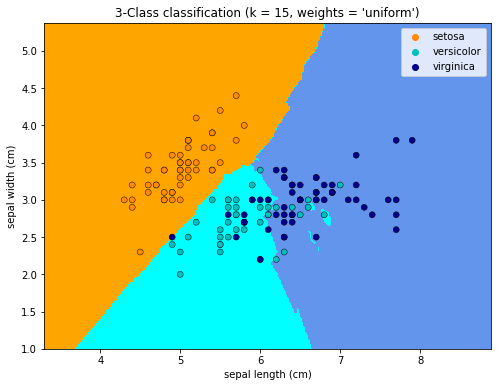

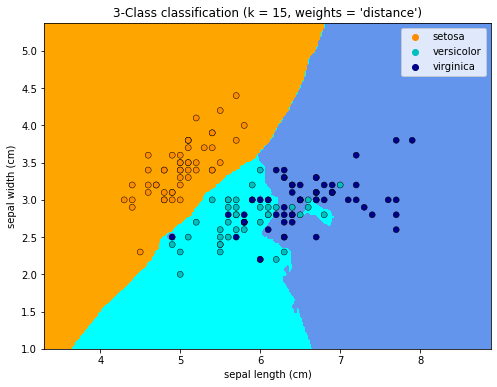

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()